# lcEnhance Tutorial


In [1]:
#Packages & plotting params to make clearer
import numpy as np
import matplotlib.pyplot as plt
import lightcurveenhanced as lce
plt.rcParams["lines.markersize"] = 3

Example 1: Creating a transit from transit parameters, and plotting both phasefolded and unphasefolded light curves


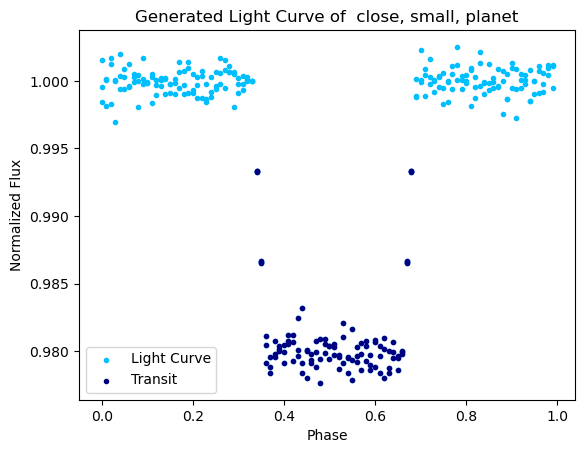

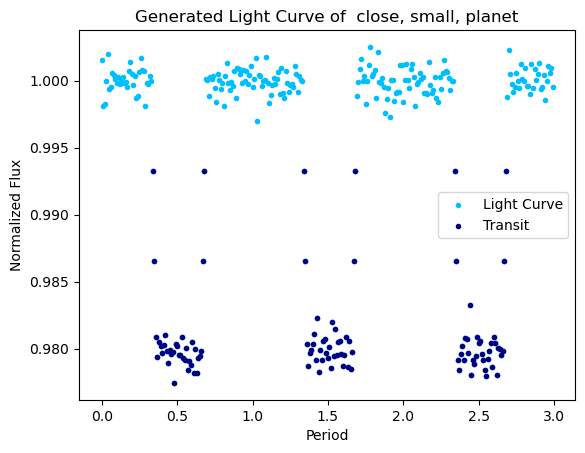

In [2]:
shallow_long_transit = lce.LightCurveTheoretical(ticksinper = 100, depth = .02, duration = .3, numper = 3, name = " close, small, planet")
_ = shallow_long_transit.plot_transit(phase_flag=True) #assigning to _ to mute output from matplotlib. 
_ = shallow_long_transit.plot_transit(phase_flag=False)

Example 2: Defining system parameters and plotting potential lightcurves from them

In [3]:
earth = lce.Exoplanet(1, 1, rad_unit = "R_earth")
print(earth.radius.to('m'))
print(earth.a)

6378100.0 m
1.0 AU


In [4]:
#Defining an example system - HD 209458
HD_209458b = lce.Exoplanet(1.35, .047)
HD_209458 = lce.Star(1.2)

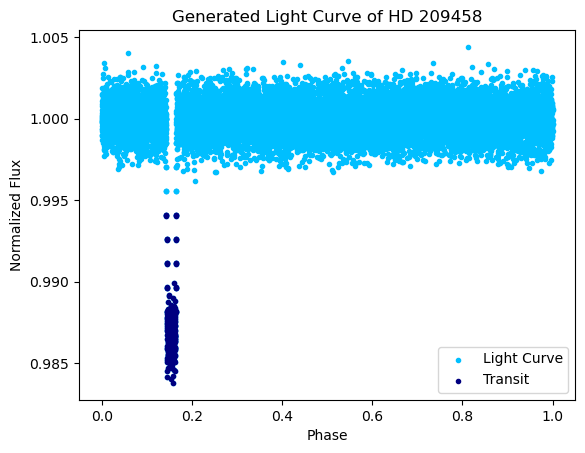

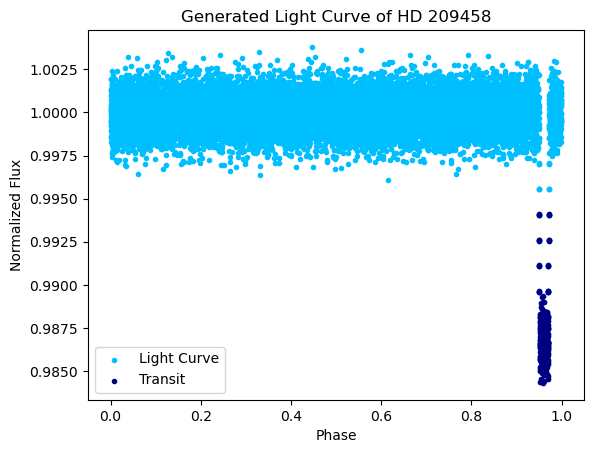

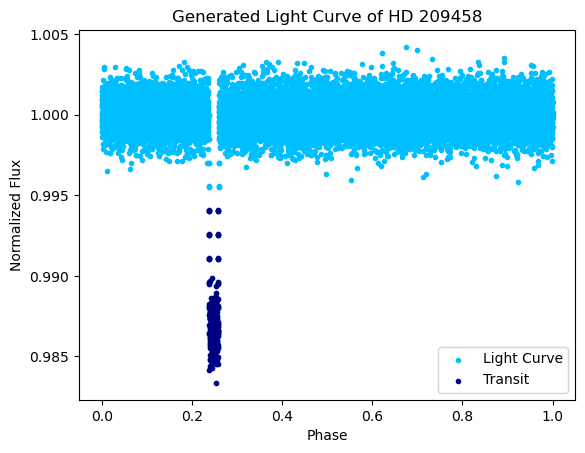

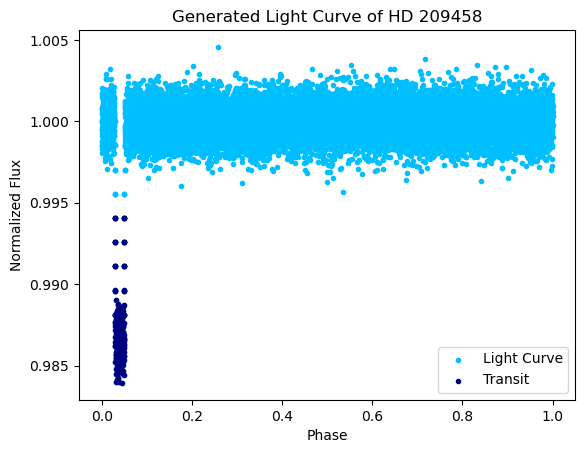

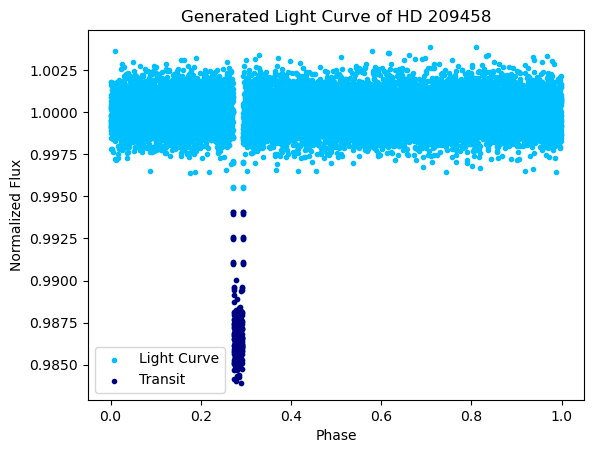

In [5]:
#Plotting 5 possible light curves (phasefolded) of the example system
for i in np.arange(0,5):
        HD_sys = lce.LightCurveExoplanet(HD_209458b, HD_209458, ticksinper=5000, numper = 3, name = "HD 209458")                
        HD_sys.plot_transit(phase_flag=True)

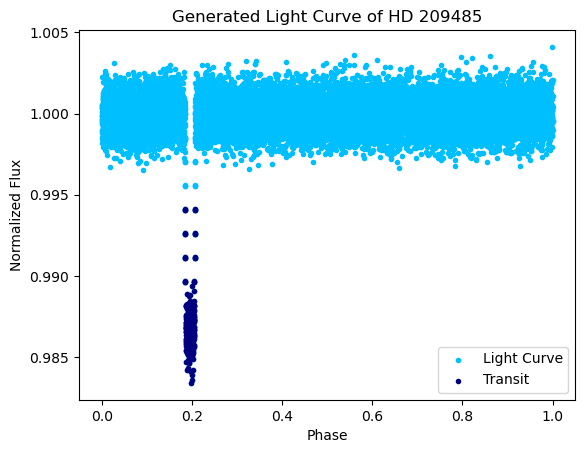

In [6]:
HD_sys = lce.LightCurveExoplanet(HD_209458b, HD_209458, ticksinper=5000, numper = 3, name = "HD 209485")                
timeseries, flux = HD_sys.plot_transit(phase_flag=True)

Zooming in on a transit (in this case, around phase = 0.2). Also, note how the plot stays the same as the object sunjup is not redefefined.

0.013347216679874955
0.018897315377084795


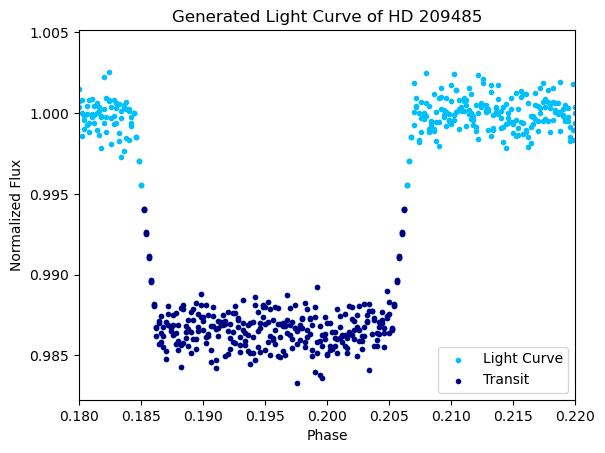

In [16]:
HD_sys.plot_transit(phase_flag=True, xlim = [0.18,0.22])
print(HD_sys.depth)
print(HD_sys.duration/HD_sys.ticksinper)

The output of plot_transit are the arrays of timeseries and flux (always unphasefolded). In order to phase fold, add % 1 to mod the timeseries.

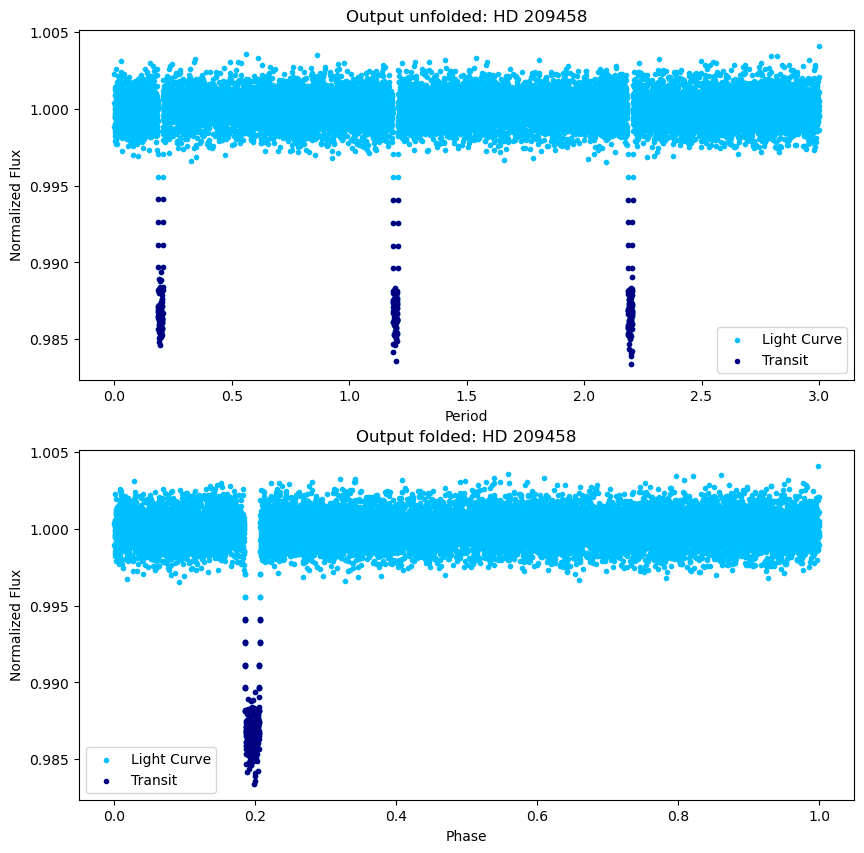

In [8]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,10), sharey = True)
ax0.scatter(timeseries, flux, color = "deepskyblue", label = "Light Curve")
idxs = np.where(flux<.995)[0]
ax0.scatter(timeseries[idxs], flux[idxs], color = "navy", label = "Transit")
ax0.set_xlabel("Period")
ax0.set_ylabel("Normalized Flux")
ax0.set_title("Output unfolded: HD 209458")
ax0.legend()

ax1.scatter(timeseries%1, flux, color = "deepskyblue", label = "Light Curve")
idxs = np.where(flux<.995)[0]
ax1.scatter(timeseries[idxs]%1, flux[idxs], color = "navy", label = "Transit")
ax1.set_xlabel("Phase")
ax1.set_ylabel("Normalized Flux")
ax1.set_title("Output folded: HD 209458")
ax1.legend()

In [28]:
hat_p5b = lce.Exoplanet(1.26, 0.04073)
hat_p5_star = lce.Star(1.16)
hat_p5 = lce.LightCurveExoplanet(hat_p5b,hat_p5_star,ticksinper=1000,numper=2, name="Hat P-5b")

0.012634283395491377
0.021079499843658707


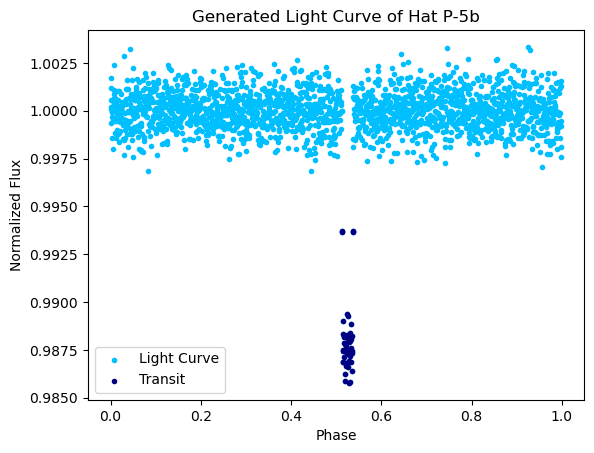

In [ ]:
hat_p5.plot_transit(phase_flag=True)
print(hat_p5.depth)
print(hat_p5.duration/hat_p5.ticksinper)